In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from itertools import product
from sklearn.preprocessing import StandardScaler 

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['text.usetex'] = False
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
mpl.rcParams['figure.dpi'] = 300

# Neural Networks

This notebook will cover the basics of multi-layer neural networks. First, we recall some of the material from the previous tutorials on classification and regression. Then we'll have an introduction to neural networks, focusing on a particular case - the multi-layer perceptron (MLP). After walking through a detailed numerical example, we'll test out the MLP on several example datasets.

# 1. Review of classification methods

## Classification problems

One of the fundamental machine learning tasks is learning a mapping from an input to a discrete set of classes. This is known as classification. For example, finding a mapping that takes an image and assigning a label to it from the classes {cat, dog} is a classification problem. The mapping itself is called a classifier.

To build up to neural networks, we'll first go over some of the approaches covered in earlier lectures, including logistic regression and decision trees. We'll do this in the context of a toy dataset from the scikit-learn package.

## Logistic regression

First, we load up an example dataset. This will be used to evaluate logistic regression and also to compare with other classification approaches. We'll use the digits dataset, which consists of about 1800 8x8 grayscale images of digits, and the corresponding label indicating the digit (a number from 0 through 9).

In [2]:
from sklearn.datasets import load_digits

example_dataset = load_digits()
X = example_dataset["data"]
y = example_dataset["target"]

df = pd.DataFrame(zip(X,y),columns = ["X","y"])
df.head()

,X,y
0,"[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0, 0.0,...",0
1,"[0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0, 0.0...",1
2,"[0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0, 0.0...",2
3,"[0.0, 0.0, 7.0, 15.0, 13.0, 1.0, 0.0, 0.0, 0.0...",3
4,"[0.0, 0.0, 0.0, 1.0, 11.0, 0.0, 0.0, 0.0, 0.0,...",4


We canuse matplotlib's `imshow` function to view the image:

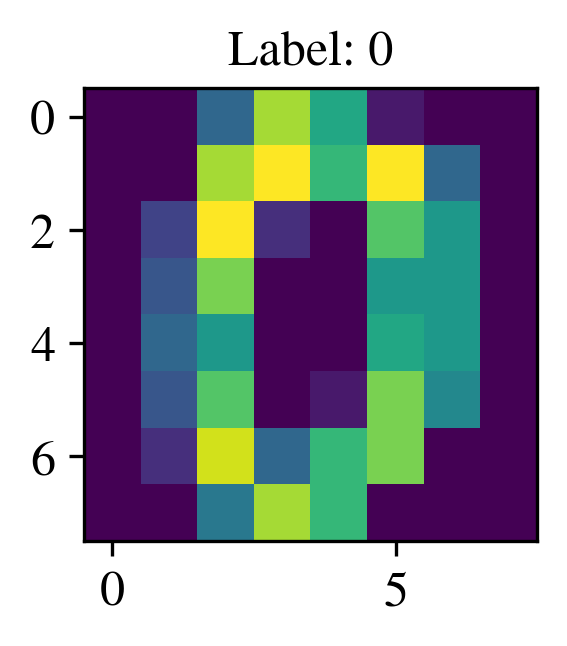

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

idx = 0
plt.imshow(X[idx].reshape(8,8))
plt.title("Label: {}".format(y[idx]));

Now we'll train a logistic regression model on this dataset. For this, we'll use the built in `LogisticRegression` model type from scikit-learn.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

logreg.fit(X_train, y_train)

preds_test = logreg.predict(X_test)

print("Accuracy on testing data: {}".format( accuracy_score(y_test,preds_test)) )

pd.DataFrame(zip(X_test,y_test,preds_test),columns = ["X","True y", "Predicted y"])

Accuracy on testing data: 0.9629629629629629


,X,True y,Predicted y
0,"[0.0, 0.0, 4.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0....",3,3
1,"[0.0, 0.0, 7.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0....",3,3
2,"[0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0...",4,4
3,"[0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0,...",4,4
4,"[0.0, 0.0, 2.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0...",1,1
...,...,...,...
265,"[0.0, 0.0, 2.0, 14.0, 13.0, 0.0, 0.0, 0.0, 0.0...",0,0
266,"[0.0, 0.0, 0.0, 2.0, 15.0, 7.0, 0.0, 0.0, 0.0,...",4,4
267,"[0.0, 0.0, 5.0, 13.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",6,6
268,"[0.0, 0.0, 0.0, 13.0, 15.0, 8.0, 0.0, 0.0, 0.0...",1,1


# Underneath the hood

Logistic regression works by finding a linear separator of the classes. Geometrically, this can be thought of as a plane in the input space, which separates the space into everything above and everything below the plane.
<img src="img/linearly_separable_4.png">
The training phase of logistic regressing finds the coefficients that represent this plane. In scikit-learn, this is represented as two data attributes: a vector `logref.coef_` and a numerical offset `logref.interept_`.

At inference time, given an item to classify, we first transform the features with the coefficient matrix to get a vector of scores for each class:

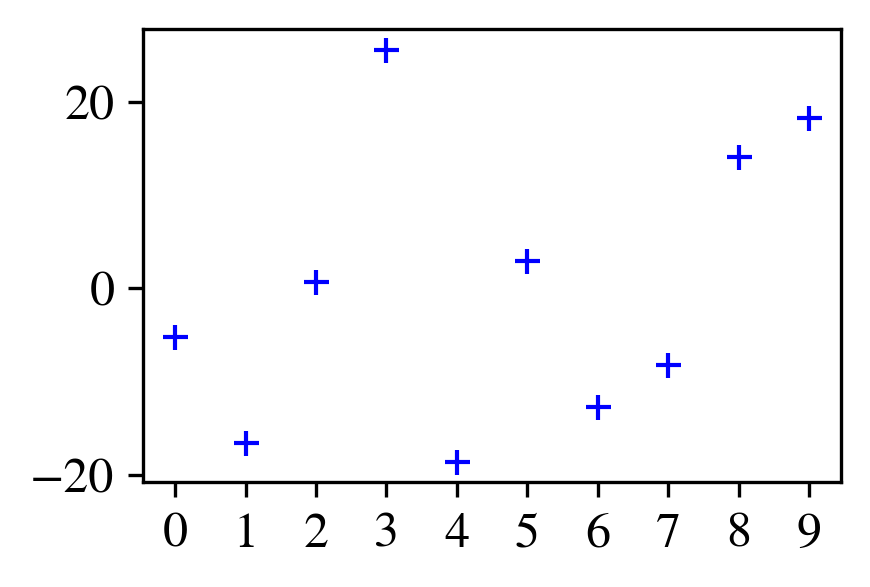

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

raw_scores = logreg.coef_ @ X_test[5] + logreg.intercept_
plt.plot(raw_scores,'+',color='b')
plt.xticks(ticks=range(10));

The softmax function can be used to map the raw scores into a probability distribution over the labels, as shown below. We have also indicated the true class for this example 

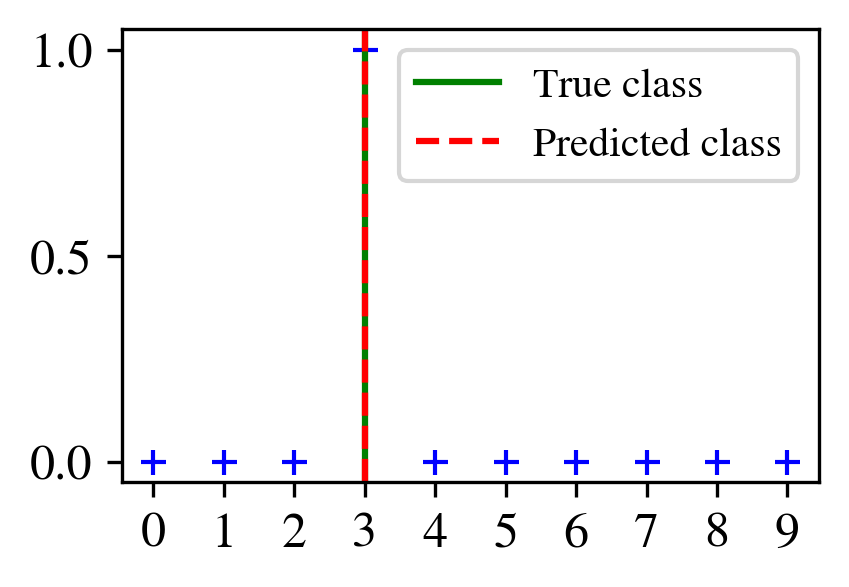

In [6]:
from scipy.special import softmax
scores = softmax(raw_scores)

fig, ax = plt.subplots(1, 1, figsize=(3, 2))

plt.plot(scores,'+', color='b')
plt.axvline(y_test[5],color='g',label="True class")
plt.axvline(preds_test[5],linestyle='--',color='r',label="Predicted class")
plt.legend()
plt.xticks(ticks=range(10));

To be sure, let's look at test example 0:

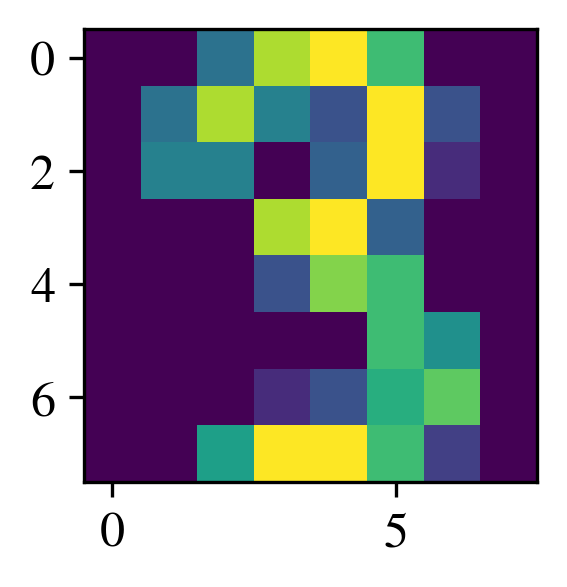

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))

plt.imshow(X_test[5].reshape(8,8));

## Decision tree

We also saw decision trees. These can be used for classification as well, and are just as simple to access in scikit learn:

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier = DecisionTreeClassifier(criterion="entropy", max_depth=100, random_state=123)

classifier.fit(X=X_train, y=y_train)

preds_test = classifier.predict(X_test)

print("Overall accuracy: {}".format(accuracy_score(y_test,preds_test)))

pd.DataFrame(zip(X_test,y_test,preds_test),columns = ["X","True y", "Predicted y"]).head()

Overall accuracy: 0.8814814814814815


,X,True y,Predicted y
0,"[0.0, 0.0, 4.0, 13.0, 16.0, 11.0, 0.0, 0.0, 0....",3,3
1,"[0.0, 0.0, 7.0, 16.0, 16.0, 14.0, 0.0, 0.0, 0....",3,3
2,"[0.0, 0.0, 0.0, 13.0, 12.0, 0.0, 0.0, 0.0, 0.0...",4,4
3,"[0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0, 0.0,...",4,4
4,"[0.0, 0.0, 2.0, 15.0, 14.0, 1.0, 0.0, 0.0, 0.0...",1,1


# 2. Neural networks

## Structure of a neural network

Neural network models process their inputs by passing them through a number of transformations before producing their final outputs. We'll focus on one of the simplest classes of neural networks - multi layer perceptrons - for this tutorial. A multilayer perceptron, or MLP, model is made up of a number of layers. Each layer computes a transformation of the data produced at the previous layer. You can keep in mind the following picture:
<center><img src="img/multi-layer-perceptron-in-tensorflow.png" alt="Logic gate symbols, as typically used in electronics"/></center>

Above, we can see three different parts of the network. On the left the input layer. This represents the input to your network. For example, the image you want to classify, or the various plant features in the iris dataset. The right shows the output layer. In a classification scenario, the nodes of the output layer have the scores for each possible class.
In between, we have the hidden layers. These represent the intermediate states of the networks' computation. The idea is that by passing the input through multiple stages of processing, the final hidden layer might be a more useful representation for classification compared to a raw input.

Let us get into more details using an example of a network with 1 hidden layer. In this example, we will define a network that classifies an input vector, assigning it to one of two classes. We will assume the input is two dimensional. The output will be a single number.

Mathematically, the model is defined using a set of weight matrices and bias vectors. Each layer has one weight matrix and one bias vector. We will denote these as $w_1$ and $w_2$ and $b_1$ and $b_2$.

Another important component of the network is the activation function. We denote this by $\sigma$. In the example below we use the sigmoid function (also known as the logistic function):
$\sigma(u) = \frac{1}{1+e^{-u}}$

As a reminder, here is how we may write the sigmoid function in python, along with a plot of how it looks:

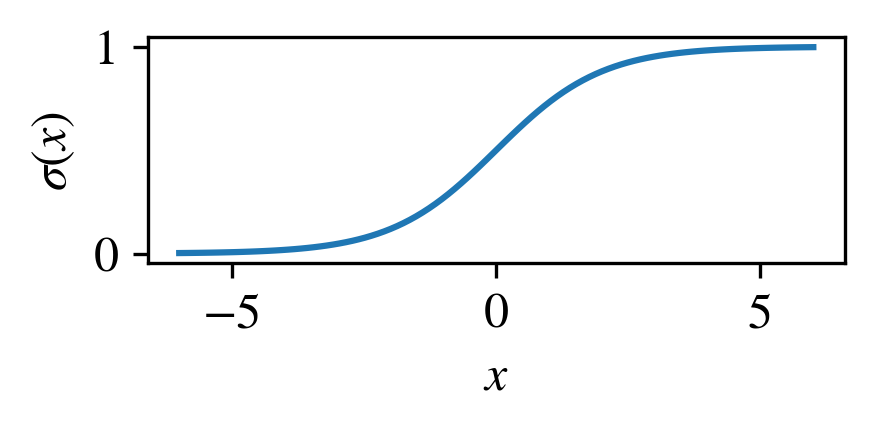

In [22]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

fig, ax = plt.subplots(1, 1, figsize=(3, 1))

grid = np.linspace(-6, 6, 100)
ax.plot(grid, sigmoid(grid))
ax.set_xlabel("$x$")
ax.set_ylabel("$\sigma(x)$");

Given these definitions, we are now ready to describe the neural network model. Given an input $x$, the value at the hidden layer is
$$h = \sigma( w_1 x + b_1)$$
and the value at the output layer is
$$y = w_2 h + b_2$$
Overall, the mapping from the inputs to the outputs is
$$y = w_2 \sigma(w_1 x + b_1) + b_2$$
Below, we implement this network in python, using some predfined weights and biases:

In [10]:
w1 = np.array([[2., 2.],
               [2., 2.]])

b1 = np.array([-3,
               -1])

w2 = np.array([
               [-2.,2.]])
b2 = np.array([
               -0.7])

def simple_mlp(x):
    h = sigmoid(w1@x + b1)
    out = w2@h + b2
    return out

Let's see the output of this network at a few inputs:

In [11]:
vals = [ [0,0],
         [0,1],
         [1,0],
         [1,1] ]
for v in vals:
    out = simple_mlp(v)
    print("For input {} the output is {}".format(v,out))

For input [0, 0] the output is [-0.2569689]
For input [0, 1] the output is [0.22423431]
For input [1, 0] the output is [0.22423431]
For input [1, 1] the output is [-0.2569689]


Since we're using this network for classification, we'll assign the class based on the sign of the output. Non-positive outputs are mapped to class 0, while positive outputs get class 1.

In [12]:
for v in vals:
    out = simple_mlp(v)
    c = (1 if out >0 else 0) 
    print("For input {} the output class is {}".format(v,c))

For input [0, 0] the output class is 0
For input [0, 1] the output class is 1
For input [1, 0] the output class is 1
For input [1, 1] the output class is 0


Does this input/output mapping seem familiar to you? As we shall see below, this example highlights the ability of multi-layer neural networks to have non-linear decision boundaries, a property which sets these models apart from simpler ones like logistic regression.

## Probing the network

To gain some insight into how this neural network works, we can look at it's decision boundaries. This is a visual display of how the input space is partitioned into different classes by the network

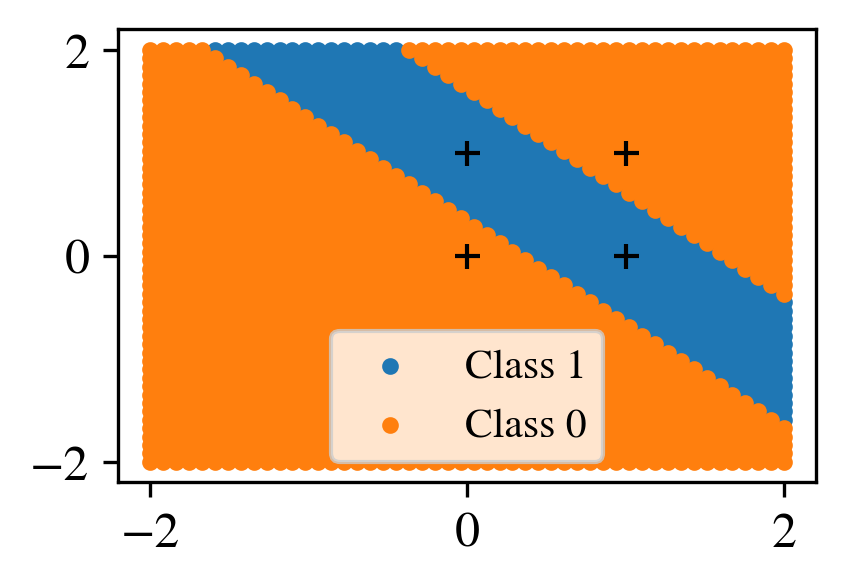

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2)) 

sz = 50
i1 = np.linspace(-2,2,sz)

pts = np.zeros((sz*sz,2))
vals = np.zeros(sz*sz)

for (idx, (x,y)) in enumerate(product(i1,i1)):
    for j in range(sz):
        v = simple_mlp(np.array([x,y]))
        vals[idx] = (1 if v> 0 else 0)
        pts[idx] = ([x,y])

plt.plot(1,1,'+',c='black')
plt.plot(0,0,'+',c='black')
plt.plot(1,0,'+',c='black')
plt.plot(0,1,'+',c='black')

plt.scatter( pts[vals > 0][:,0], pts[vals>0][:,1],marker='.',label="Class 1" )
plt.scatter( pts[vals <= 0][:,0], pts[vals<=0][:,1],marker='.',label="Class 0" )
plt.legend();

## Why not stick to logistic regression?
Why go through all of the trouble of using an MLP if a logistic regression model works just fine? Let's see how it does.

In [14]:
X = [ [0, 0],
      [0, 1],
      [1, 0],
      [1, 1] ]

y = [ 0,
      1,
      1,
      0]

logreg = LogisticRegression(random_state=123)

logreg.fit(X, y)
preds_test = logreg.predict(X)

print("Overall accuracy: {}".format(accuracy_score(y,preds_test)))

pd.DataFrame(zip(X,y,preds_test),columns = ["X","True y", "Predicted y"])

Overall accuracy: 0.5


,X,True y,Predicted y
0,"[0, 0]",0,0
1,"[0, 1]",1,0
2,"[1, 0]",1,0
3,"[1, 1]",0,0


We see that it only gets 50% right. This is because the decision boundary of a logistic regression model is always linear. There is no setting of coefficients and biases the will make such a linear model be able to separate the data (0,1) and (1,0) from (0,0) and (1,1).

Intuitively, the benefit of using multiple layers, as in the case of the MLP we defined above, is that the earlier layers can transform the data such that they corresponding hidden representations are linearly separable.

## Using scikit-learn's MLPClassifier

For the MLP example above, we hardcoded the weights and biases. In practice, we'd use an optimization procedure to find the best set of parameters, instead of setting them by hand. Let's see how we could do that using scikit learn in the context of the example above.

In [15]:
from sklearn.neural_network import MLPClassifier

X = [ [0,0],
      [0,1],
      [1,0],
      [1,1] ]

y = [ 0,
      1, 
      1,
      0]

clf = MLPClassifier(hidden_layer_sizes=(2),solver='lbfgs', activation='logistic',random_state=0)
clf.fit(X,y)
preds_test = clf.predict(X)
pd.DataFrame(zip(X,y,preds_test),columns = ["X","True y", "Predicted y"]).head()

,X,True y,Predicted y
0,"[0, 0]",0,0
1,"[0, 1]",1,1
2,"[1, 0]",1,1
3,"[1, 1]",0,0


Nice! Just as we did with our `simple_mlp` implementation, we can probe the decision boundary of the MLP we just trained:

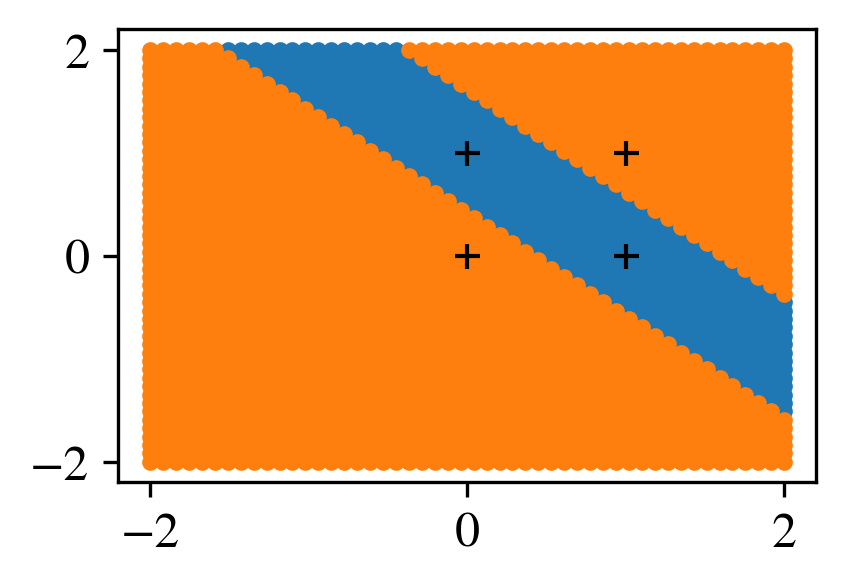

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2)) 

sz = 50
i1 = np.linspace(-2,2,sz)

pts = np.zeros((sz*sz,2))
vals = np.zeros(sz*sz)

for (idx, (x,y)) in enumerate(product(i1,i1)):
    for j in range(sz):
        v = clf.predict(np.array([[x,y]]))
        vals[idx] = v[0]
        pts[idx] = ([x,y])

plt.plot(1,1,'+',c='black')
plt.plot(0,0,'+',c='black')
plt.plot(1,0,'+',c='black')
plt.plot(0,1,'+',c='black')

plt.scatter( pts[vals > 0][:,0], pts[vals>0][:,1],marker='.',label="Class 1" )
plt.scatter( pts[vals <= 0][:,0], pts[vals<=0][:,1],marker='.',label="Class 0" );

There will probably be some subtle differences between the function learned by scikit-learn and the one we defined, but the classes assigned to the instances in our dataset should be the same.

Next, let's try out MLP models on some of the toy datasets in scikit learn

## Example #1: Digits dataset

In [17]:
example_dataset = load_digits()

X = example_dataset["data"]
y = example_dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

clf = MLPClassifier(alpha=1,hidden_layer_sizes=(500), activation='logistic',random_state=1)

clf.fit(X_train,y_train)

preds_test = clf.predict(X_test)

print("Overall accuracy: {}".format(accuracy_score(y_test,preds_test)))

Overall accuracy: 0.9703703703703703


## Example #2: Iris dataset

In [18]:
from sklearn.datasets import load_iris

example_dataset = load_iris()

X = example_dataset["data"]
y = example_dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

clf = MLPClassifier(alpha=1,hidden_layer_sizes=(500), activation='logistic', max_iter=1000, random_state=1)

clf.fit(X_train,y_train)

preds_test = clf.predict(X_test)

print("Overall accuracy: {}".format(accuracy_score(y_test,preds_test)))

Overall accuracy: 0.9130434782608695


## Example #3: Materials science data

As a final example, let's revisit the coordination number dataset from the RandomForests tutorial, which comes from the paper [1]. First, we load the data, fetching it from the web (this might take a few seconds.)

[1] S. B. Torrisi, M. R. Carbone, B. A. Rohr, J. H. Montoya, Y. Ha, J. Yano, S. K. Suram & L. Hung. [Random forest machine learning models for interpretable X-ray absorption near-edge structure spectrum-property relationships.](https://www.nature.com/articles/s41524-020-00376-6) npj Comput. Mater. 6, 109 (2020).

In [19]:
import json
import requests
url = "https://s3.amazonaws.com/publications.matr.io/4/deployment/data/files/spectral_data/Ti_XY.json"
r = requests.get(url)
text = r.text.split("\n")
data = [json.loads(xx) for xx in text[:-1]]

Next, we create inputs and targets from this data.

In [20]:
from sklearn.preprocessing import StandardScaler
e_grid = data[0]["E"]
spectra = np.array([
    dat["mu"] for dat in data
    if dat["one_hot_coord"] is not None
])
coordinations = np.array([
    dat["coordination"] for dat in data
    if dat["one_hot_coord"] is not None
])
scaler = StandardScaler()
spectra = scaler.fit_transform(spectra)

From here, we can use the same workflow as the other classification examples:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(spectra, coordinations, test_size=0.1)
clf = MLPClassifier(alpha=1,hidden_layer_sizes=(200), activation='relu',random_state=1)
clf.fit(X_train,y_train)
preds_test = clf.predict(X_test)
print(accuracy_score(y_test,preds_test))

0.870020964360587


## Excercises

- We didn't go into details on data scaling or normalization, but neural network training often benefits from having the data normalized, so that each coordinate has mean zero and unit variance. In Scikit-learn, this is handled by the `StandardScaler` class. Try commenting out the `spectra = scaler(...` line and see how performance changes.

- Experiment with different settings for `hidden_layer_sizes`. Try using some other values for hidden layer size, including smaller (e.g. 50 or 100) and larger (e.g. 400, 800). You can also pass multiple numbers, separated by commas, to have multiple hidden layers.

- Using the digits dataset, compare the accuracy of decision trees, a MLP, and logistic regression. Is there any clear winner?